# Confidence Interval
  CI= X _+ Z(S/sqrt(n))

  x= sample mean
  Z= confidence level value(Constant)
  s= Sample standard deviation
  n= sample size

Note : Z is a constant and depending upon the confidence level(90%, 95%, 99%) the value of Z is determined.

Z for 95% is 1.64


In [ ]:
import scipy.stats as st
import statistics as s
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
height=[169,174,155,158, 195, 158, 163,175,172, 182, 176]

In [ ]:
len(height)

11

In [ ]:
sample_mean=np.mean(height)

In [ ]:
#Calculating Z value
z_val=st.norm.ppf(0.95)

s.norm -> inside the stats function called norm
norm.ppf() -> ppf full form is percentage point function takes confidence level for 95% - 0.95

In [ ]:
std_dev=np.std(height)

If the std_deviation is 11 and
when std_deviation X Z_val = 11*1.64 = 18.04
gives spread of data from mean

In [ ]:
# You dont have to calculate standard error of mean
sem = st.sem(height)

In [ ]:
lower_range=sample_mean-(z_val*sem)
upper_range=sample_mean+(z_val*sem)
print(f" Lower range : {lower_range}")
print(f" Upper range : {upper_range}")

 Lower range : 164.75041663266273
 Upper range : 176.52231064006452


<Figure size 1000x500 with 0 Axes>

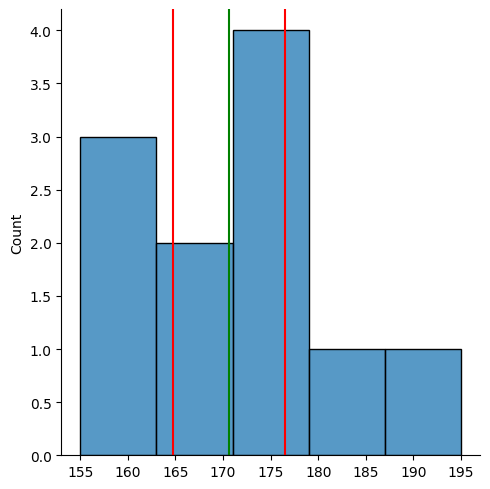

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.displot(height)
plt.axvline(x=lower_range,color='red')
plt.axvline(x=upper_range,color="red")
plt.axvline(x=sample_mean, color="green")
plt.show()

# T-Test
T-test is a parameteric test, that compares the means of the two samples. Ideally, a sample for t-test should have less than 30 values. There are a few other assumptions that are taken before we can conduct a t-test.

# Assumptions:
 - The sample are independent.
 - Homogeneity in sample variances.
 - The data is assumed to be normally distributed.

# Types of T-Test
 - One-Sample: if we compare the sample against a std value.
 - Two-Sample: if both samples are taken from 2 different populations
 - Paired: if the samples are taken from the same population.


# One Sample T-Test

In [ ]:
from scipy.stats import ttest_1samp
from random import sample
import numpy as np

Problem Statement: test the hypothesis whether average weight of a new born is 3kg.

Null Hypothesis: Avg wt. of new born baby is 3kg.

Alternate Hypothesis: Avg wt. of new born baby is not 3kg.

In [ ]:
weights=[2,1,5,1,2,3,4,2,3,5]
avg_weight=np.mean(weights)
ttest_1samp(weights,popmean=3) #popmean= population mean takes the assumed value

TtestResult(statistic=-0.42857142857142894, pvalue=0.6783097418055795, df=9)

if p-value is < 0.05 ( alpha=1-level of confidence ) then we can say that with 95% confidence I can reject the null hypothesis.

# Two Sample T-Test
Problem Statement: Compare the average salary of male and femmale employees and the find out whether both groups have same salaries or different.

Null Hypothesis: Both male and female employees have same average salaries.

Alternate Hypothesis: Both male and female employees do not have the same average salaries.

In [ ]:
from scipy.stats import ttest_ind
from random import sample
import numpy as np
male_salaries=sample(range(40,100),30)
female_salaries=sample(range(20,50),30)

ttest_ind(male_salaries , female_salaries,equal_var=False)

TtestResult(statistic=9.235970764075054, pvalue=1.1320488917073025e-11, df=42.02714255009248)

if p-value is < 0.05 ( alpha=1-level of confidence ) then we can say that with 95% confidence I can reject the null hypothesis.

#Paired T-Test
Problem Statement: You want to compare the blood sugar level before fasting and blood sugar level after eating is same or not.

Null Hypothesis: Its the same

Alternate Hypothesis: Its not the same

In [ ]:
from scipy.stats import ttest_rel
before_wts=sample(range(55,85),30)
after_wts=sample(range(65,95),30)
ttest_rel(before_wts,after_wts)

TtestResult(statistic=-3.9514279952598024, pvalue=0.00045639662777347836, df=29)

if p-value is < 0.05 ( alpha=1-level of confidence ) then we can say that with 95% confidence I can reject the null hypothesis.

# Z-Test
Z-test isa statistical test to compare the means of population where the variances are known and sample sizes are considerably laarger compared to t-test.

Z-test is similar to t-test except sample size is greater than 30

# One Sample Z-Test
Problem Statement: Based on some historical data ,average literacy rate in particular country was 89% test this hypothesis with appropriate technique for recent times.

Null Hypothesis: avg literacy is 89%
Alternate Hypothesis: avg literacy is not 89%

In [ ]:
from statsmodels.stats.weightstats import ztest

sample1=sample(range(25,100),50)
ztest(sample1,value=89)

(-9.338966053771006, 9.727941188729055e-21)

# Two Sample Z Test
Compare the avg literacy rate of urban and rural regions in India and check if it is same or different.

Null Hypothesis: Average literacy rate of urban and rural is same.

Alternate Hypothesis: Average literacy rate is different.



In [ ]:
urban_lit=sample(range(50,100),50)
rural_lit=sample(range(30,90),50)
ztest(urban_lit,rural_lit)

(4.503863342671719, 6.672912558309733e-06)

# F-Test
F-Test is a statiscal test that is used to compare the variances of two populations. There are several assumptions that are made about the data before we can begin the f-test.

Assumptions:
- Data is normally distributed
- The data is independent

In t-test and z-test we were comparing the mean so the parameter was mean.

In F-Test we are comparing the variance.

Problem Statement: Compare the variance of male and female salaries in both groups have same or different distributions

Null Hypothesis: Both male and female have equal variances

Alternate Hypothesis: Make and Female have different variances.

In [ ]:
male_salary=sample(range(10,100),35)
female_salary=sample(range(45,80),35)

f_stat=np.var(male_salary)/np.var(female_salary)
# Now you have to calculate p_value using f_statistics.
p_val=st.f.cdf(f_stat,len(male_salary)-1,len(female_salary)-1)
print(f"p_value: {p_val}")

p_value: 0.9999999630887771


- Stats library has a function f

in f function there another function cdf ( f, degrees of freedom gr1, degrees of freedom gr2 )

- cdf takes 3 parameters
- degrees of freedom - can be calculated in many ways in general it is  calculated as no. of samples - 1. But here we calculate as length of sample - 1.


# ANOVA
Analyis of Variance  is a collection of statistical models and their associated estimation procedures used to analyze the differences among means. It compares the variance of multiple groups more than 3

- One Way ANOVA

Null Hypothesis: All the groups have same variances

Alternate Hypothesis: All the groups does not have same variances.

In [ ]:
from scipy.stats import f_oneway
India=sample(range(10,200),40)
USA=sample(range(100,1000),40)
Japan=sample(range(10,800),40)
print(f_oneway(India,USA,Japan))

F_onewayResult(statistic=44.72229140618993, pvalue=3.739974757910645e-15)


- Two ANOVA


1.   Impact of more than one categorical data on our marks
2.   Relevance of the categorical data on the marks ( Are they correlated )
3.   One variable has to be numerical and all the other variables has to  be categorical.



In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd
df=pd.read_excel(r"Data.xlsx")
model=ols('Marks ~C(Gender) + C(Tution)',data=df).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
C(Gender),111.50,2.0,0.165799,0.857781
C(Tution),110.25,1.0,0.327881,0.624701
Residual,672.50,2.0,NaN,NaN


# Chi Square Test of Independence
Chi-Square test for categorical data that can be used to check the goodness of fit or test of independence

Assumptions:

- The features are categorical in nature.
- The samples are taken at random.
- Minimum of 5 observations expected in each group.

In [1]:
import pandas as pd
from scipy.stats import chi2_contingency
df=pd.read_excel(r"Data.xlsx")
table=pd.crosstab(df["Gender"],df["Tution"])
print(table)

Tution  No  Yes
Gender         
Female   2    0
Male     0    2
Trans    1    0


In [2]:
chi2_contingency(table)

Chi2ContingencyResult(statistic=5.0, pvalue=0.0820849986238988, dof=2, expected_freq=array([[1.2, 0.8],
       [1.2, 0.8],
       [0.6, 0.4]]))